In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Company_Data.csv")
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

Outliers

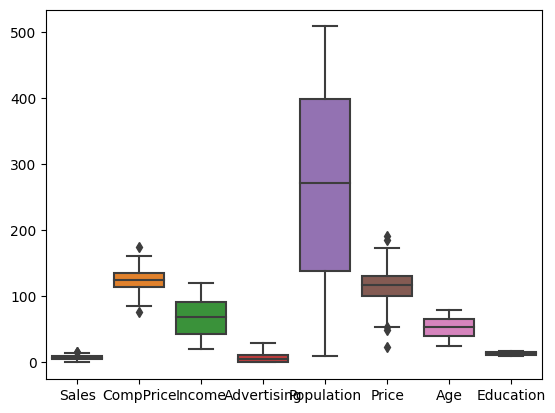

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
all = sns.boxplot(df)

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>, <Axes: >]], dtype=object)

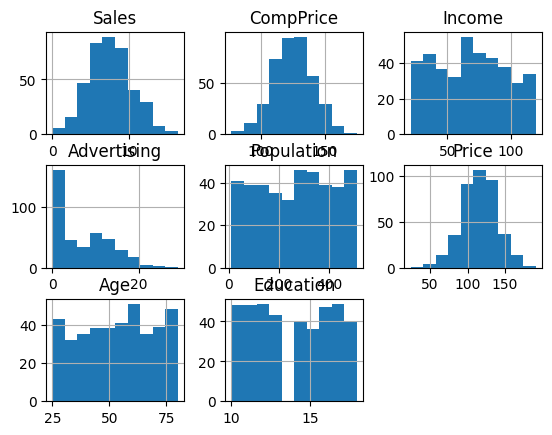

In [ ]:
df.hist()

# Convert 'Sales' into a categorical variable (e.g., High Sales and Low Sales)

In [ ]:
threshold = df['Sales'].quantile(0.75)

In [ ]:
df['Sales'] = df['Sales'].apply(lambda x: 'High Sales' if x >= threshold else 'Low Sales')

In [ ]:
df['Sales']

0      High Sales
1      High Sales
2      High Sales
3       Low Sales
4       Low Sales
          ...    
395    High Sales
396     Low Sales
397     Low Sales
398     Low Sales
399    High Sales
Name: Sales, Length: 400, dtype: object

EXPLORATORY DATA ANALYSIS

BOXPLOT

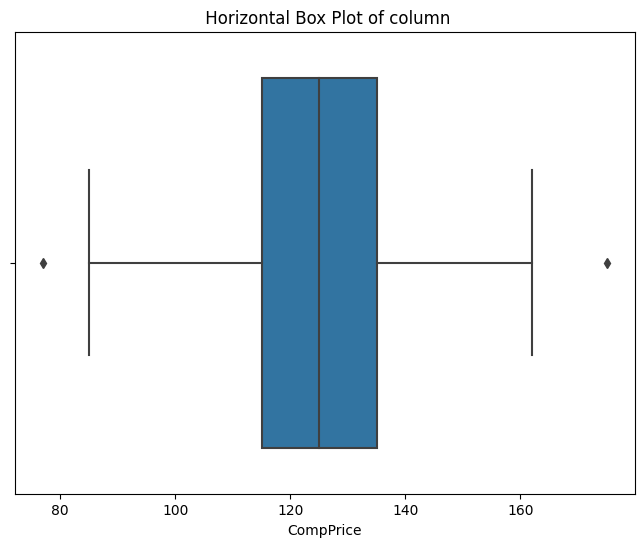

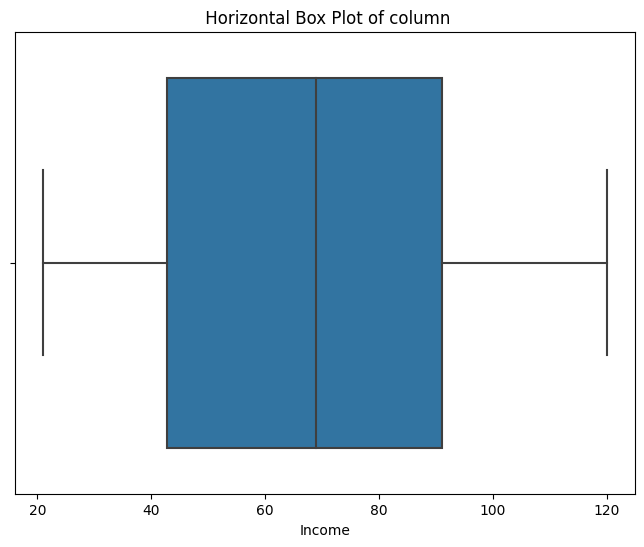

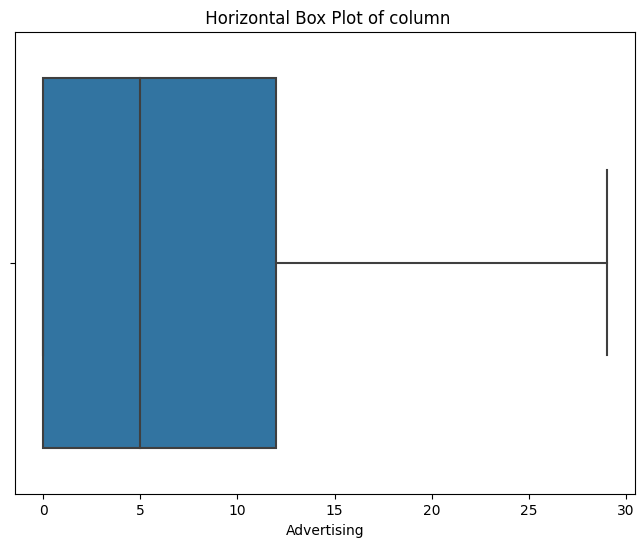

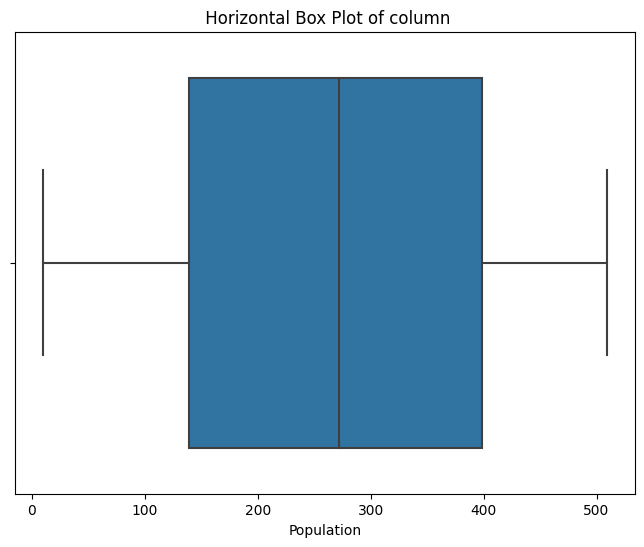

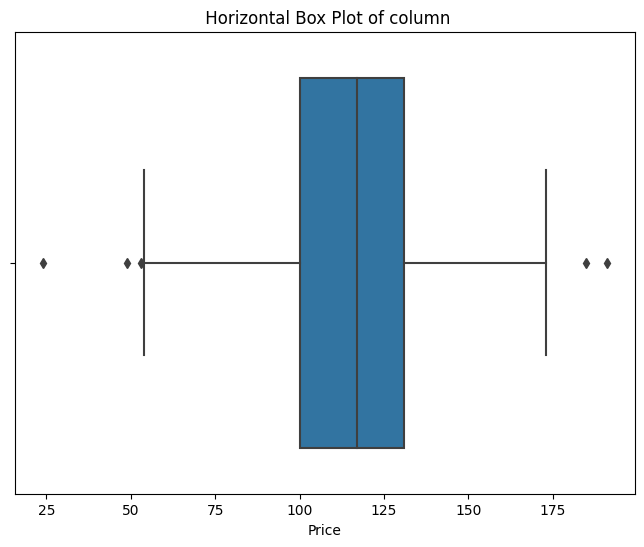

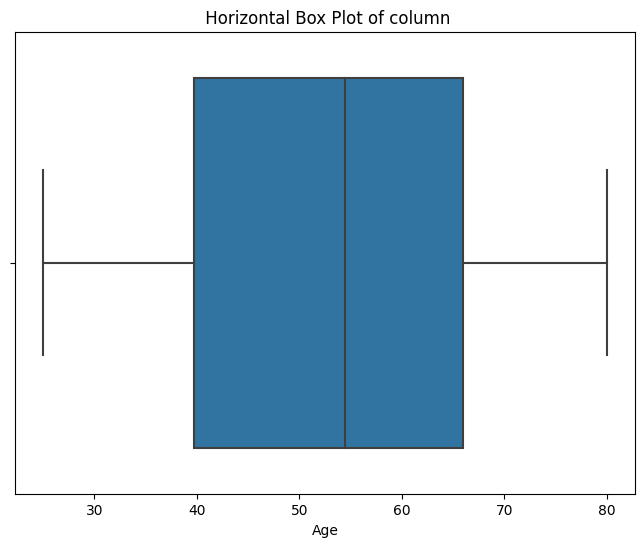

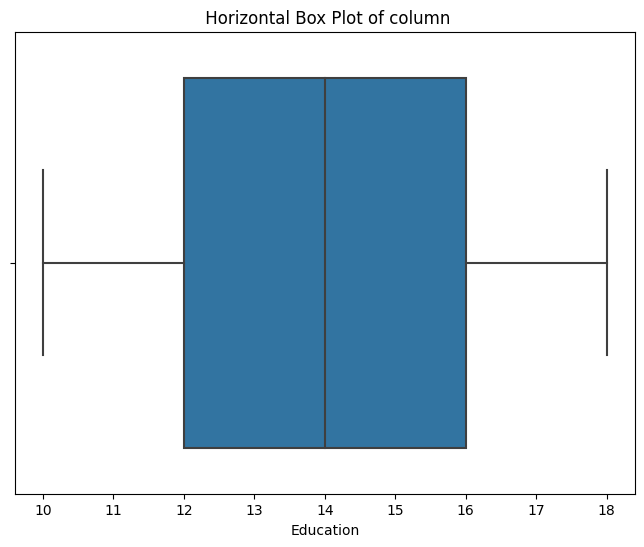

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df[df.columns[[1,2,3,4,5,7,8]]]
for column in data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

#Removing the outliers

In [ ]:
df1 = df[df.columns[[1,2,3,4,5,7,8]]]
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [ ]:
from scipy import stats
z_threshold = 3
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1))

Create a mask to identify rows with outliers

In [ ]:
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [ ]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]
df.shape  #(397, 11)

(397, 11)

HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION

array([[<Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Advertising'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>, <Axes: >, <Axes: >]],
      dtype=object)

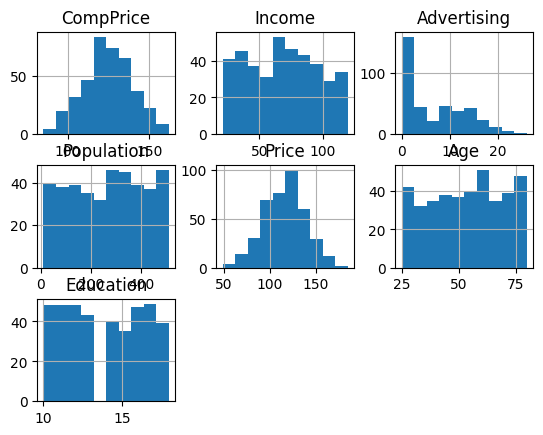

In [ ]:
df.hist()

In [ ]:
df.skew()

<ipython-input-19-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CompPrice     -0.053566
Income         0.045656
Advertising    0.589072
Population    -0.053280
Price         -0.081927
Age           -0.080826
Education      0.044988
dtype: float64

In [ ]:
df.kurt()

<ipython-input-20-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


CompPrice     -0.212801
Income        -1.098533
Advertising   -0.736543
Population    -1.194321
Price         -0.025287
Age           -1.139465
Education     -1.299541
dtype: float64

In [ ]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,124.914358,68.692695,6.594458,265.471033,115.710327,53.397985,13.891688
std,14.952204,28.086110,6.571616,147.003633,22.866967,16.206614,2.620019
min,85.000000,21.000000,0.000000,10.000000,49.000000,25.000000,10.000000
25%,115.000000,42.000000,0.000000,140.000000,100.000000,40.000000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,55.000000,14.000000
75%,135.000000,91.000000,12.000000,398.000000,131.000000,66.000000,16.000000
max,162.000000,120.000000,26.000000,509.000000,185.000000,80.000000,18.000000


Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"] = LE.fit_transform(df["Urban"])
df["US"] = LE.fit_transform(df["US"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        397 non-null    object
 1   CompPrice    397 non-null    int64 
 2   Income       397 non-null    int64 
 3   Advertising  397 non-null    int64 
 4   Population   397 non-null    int64 
 5   Price        397 non-null    int64 
 6   ShelveLoc    397 non-null    int64 
 7   Age          397 non-null    int64 
 8   Education    397 non-null    int64 
 9   Urban        397 non-null    int64 
 10  US           397 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 37.2+ KB


<ipython-input-23-fc6f46d75fac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
<ipython-input-23-fc6f46d75fac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Urban"] = LE.fit_transform(df["Urban"])
<ipython-input-23-fc6f46d75fac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Split the data into features (X) and the target variable (y)

In [ ]:
X = df.drop("Sales", axis=1)
X
Y = df["Sales"]
Y

0      High Sales
1      High Sales
2      High Sales
3       Low Sales
4       Low Sales
          ...    
395    High Sales
396     Low Sales
397     Low Sales
398     Low Sales
399    High Sales
Name: Sales, Length: 397, dtype: object

In [ ]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=123)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,
                            max_depth=7,
                            max_samples=0.6,
                            max_features=0.7,
                            random_state=123)

In [ ]:
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, max_features=0.7, max_samples=0.6,
                       random_state=123)

In [ ]:
Y_pred_train = RF.predict(X_train)

In [ ]:
Y_pred_test = RF.predict(X_test)

Metrices

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
ac1 = accuracy_score(Y_train,Y_pred_train)

In [ ]:
print("Training Accuracy Score:",ac1.round(3))

Training Accuracy Score: 0.987


In [ ]:
ac2 = accuracy_score(Y_test,Y_pred_test)

In [ ]:
print("Test Accuracy Score:",ac2.round(3))

Test Accuracy Score: 0.8


# Confusion matrix and classification report

In [ ]:
confusion = confusion_matrix(Y_test, Y_pred_test)

In [ ]:
classification_rep = classification_report(Y_test, Y_pred_test)

In [ ]:
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[12 16]
 [ 4 68]]


In [ ]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

  High Sales       0.75      0.43      0.55        28
   Low Sales       0.81      0.94      0.87        72

    accuracy                           0.80       100
   macro avg       0.78      0.69      0.71       100
weighted avg       0.79      0.80      0.78       100



Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 9],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
    }

In [ ]:
RF = RandomForestClassifier(random_state=123)

In [ ]:
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 9, 'max_features': 0.8, 'max_samples': 0.6, 'n_estimators': 50}


In [ ]:
print("Best Accuracy Score:", grid_search.best_score_)

Best Accuracy Score: 0.8787570621468926


Get the best model from the GridSearchCV

In [ ]:
best_RF = grid_search.best_estimator_

In [ ]:
Y_pred_train = best_RF.predict(X_train)
Y_pred_test = best_RF.predict(X_test)

 Metrics

In [ ]:
ac1 = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy Score:", (ac1*100).round(3))

Training Accuracy Score: 98.653


In [ ]:
ac2 = accuracy_score(Y_test, Y_pred_test)
print("Test Accuracy Score:", (ac2*100).round(3))

Test Accuracy Score: 79.0


# After hyperparameter tuning with GridSearchCV, the best parameters are:
# Max Depth: 9 ,Max Features: 0.8, Max Samples: 0.6 , Number of Estimators: 50

 Visualize Feature Importance

In [ ]:
feature_importance = pd.Series(best_RF.feature_importances_, index=X.columns)

In [ ]:
top_features = feature_importance.nlargest(10)

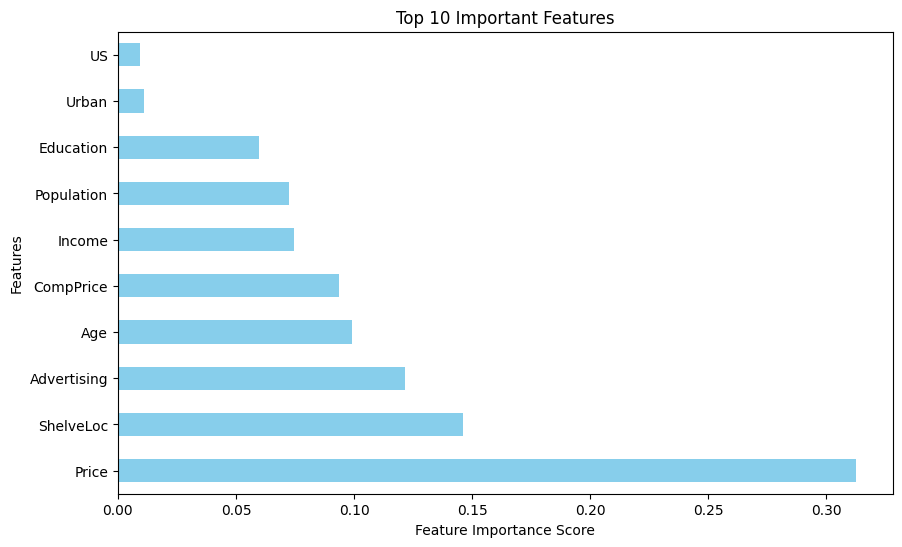

In [ ]:
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

when i applied Random Forest classifier , i got Training Accuracy Score: 99 ,Test Accuracy Score: 79%

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Convert the data to LightGBM dataset format
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)

In [ ]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [ ]:
num_round = 100
bst = lgb.train(params, train_data, num_round)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 297, number of used features: 10
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirement